<a href="https://colab.research.google.com/github/AronJorge/AronJorge/blob/main/Copia_de_Lab_3_Regresi%C3%B3n_Lineal_Y_Evaluaci%C3%B3n_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**

El aprendizaje automático, o "Machine Learning" en inglés, es una rama de la inteligencia artificial que se centra en el desarrollo de algoritmos y modelos matemáticos que permiten a las computadoras aprender a realizar tareas sin ser explícitamente programadas para hacerlo.

En términos más sencillos, en lugar de codificar reglas y decisiones específicas en un programa, en el aprendizaje automático se le da a la computadora muchos ejemplos de la tarea en cuestión, y se le permite "aprender" cómo hacerlo a partir de esos ejemplos.



**Componentes del Machine Learning**

![](https://drive.google.com/uc?export=view&id=1AL3Tb9Wztbt7OII1CvlGXQ7YAmXXEMPI)



**Representación de los datos**

![](https://drive.google.com/uc?export=view&id=1NP-SfIcQiaQQ3u7kbIEdLtOyklwuPABI)

# **1. Importar paquetes**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **2. Cargar base de datos**

Modificada en el Análisis Exploratorio de Datos.

In [2]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving bd4.csv to bd4.csv
User uploaded file "bd4.csv" with length 4047292 bytes


# **3. Análisis de relaciones entre variables**


Desde un punto de vista práctico:

* Variable Cualitativa vs Variable Cualitativa
* Variable Continua vs Variable Cualitativa
* Variable Continua vs Variable Continua

Cargar datos

In [41]:
bd4 = pd.read_csv("bd4.csv",delimiter=',')
bd4

,AEROLINEA,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,FECHA_VUELO,DIA_SEMANA,HORA_SALIDA,DISTANCIA,RETARDO_SALIDA,RETARDO_LLEGADA,VUELO_CANCELADO,...,RETARDO_NAS,RETARDO_SEGURIDAD,RETARDO_AERONAVE,LOG_DISTANCIA,LOG_RETARDO_SALIDA,RETRASO,RETARDO_NETO,RETARDO_SALIDA_2,DISTANCIA_RETARDO_SALIDA,JORNADA
0,AA,LAX,DFW,2016-12-01,4,845,1235.0,-5.0,-7.0,0.0,...,0.0,0.0,0.0,3.091667,1.206826,0,-2.0,25.0,-6175.0,2
1,AA,LAX,DFW,2016-12-02,5,845,1235.0,5.0,-3.0,0.0,...,0.0,0.0,0.0,3.091667,1.416641,0,-8.0,25.0,6175.0,2
2,AA,LAX,DFW,2016-12-03,6,845,1235.0,-3.0,-3.0,0.0,...,0.0,0.0,0.0,3.091667,1.257679,0,0.0,9.0,-3705.0,2
3,AA,LAX,DFW,2016-12-04,7,845,1235.0,-7.0,-2.0,0.0,...,0.0,0.0,0.0,3.091667,1.149219,0,5.0,49.0,-8645.0,2
4,AA,LAX,DFW,2016-12-05,1,845,1235.0,-6.0,-2.0,0.0,...,0.0,0.0,0.0,3.091667,1.178977,0,4.0,36.0,-7410.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,DL,PHX,ATL,2016-12-30,5,550,1587.0,3.0,-2.0,0.0,...,0.0,0.0,0.0,3.200577,1.382017,0,-5.0,9.0,4761.0,1
30462,DL,LAX,ATL,2016-12-30,5,2215,1946.0,11.0,-6.0,0.0,...,0.0,0.0,0.0,3.289143,1.506505,0,-17.0,121.0,21406.0,1
30463,DL,ATL,ORD,2016-12-30,5,1625,606.0,-1.0,-5.0,0.0,...,0.0,0.0,0.0,2.782473,1.303196,0,-4.0,1.0,-606.0,4
30464,DL,ORD,ATL,2016-12-30,5,1815,606.0,0.0,-30.0,0.0,...,0.0,0.0,0.0,2.782473,1.324282,0,-30.0,0.0,0.0,4


## **7.1 Variable Continua vs Variable Cualitativa**


Tablas de Resumen Numérico

In [42]:
pdf_dest_ret = bd4.groupby('AEROPUERTO_DESTINO')['RETARDO_LLEGADA'].describe().reset_index()
pdf_dest_ret

,AEROPUERTO_DESTINO,count,mean,std,min,25%,50%,75%,max
0,ATL,3081.0,3.183057,44.706092,-44.0,-17.0,-9.0,6.0,669.0
1,DEN,3889.0,12.572898,50.468509,-45.0,-12.0,-2.0,16.0,611.0
2,DFW,3248.0,6.710591,63.411868,-41.0,-14.0,-6.0,7.0,2028.0
3,LAS,3675.0,14.813878,46.317502,-34.0,-8.0,1.0,19.0,841.0
4,LAX,5253.0,22.352751,56.976524,-48.0,-7.0,6.0,32.0,951.0
5,ORD,3734.0,7.260846,63.067425,-53.0,-18.0,-8.0,8.0,1006.0
6,PHX,3243.0,11.315757,43.220568,-42.0,-9.0,0.0,15.0,920.0
7,SFO,4343.0,20.504490,50.348151,-42.0,-9.0,3.0,30.0,436.0


Representación gráfica de la información agregada

<Axes: xlabel='AEROPUERTO_DESTINO'>

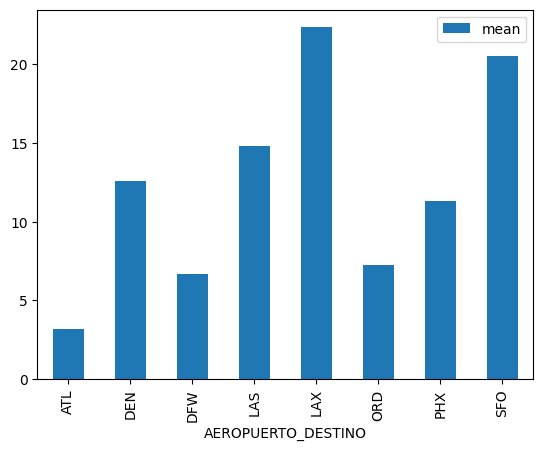

In [43]:
pdf_dest_ret.plot(kind='bar',x='AEROPUERTO_DESTINO',y='mean')

Representación gráfica de una muestra de datos

In [44]:
bd_muestra = bd4.sample(frac=0.1, replace=False, random_state=1)

Análisis de retardo de llagada por aeropuertos de destino

<Axes: xlabel='AEROPUERTO_DESTINO', ylabel='RETARDO_LLEGADA'>

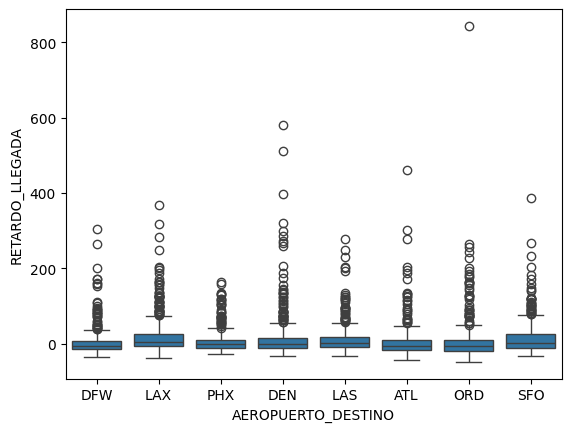

In [45]:
import seaborn as sns
sns.boxplot(x='AEROPUERTO_DESTINO',y='RETARDO_LLEGADA',data=bd_muestra)

<Axes: xlabel='AEROPUERTO_DESTINO', ylabel='RETARDO_LLEGADA'>

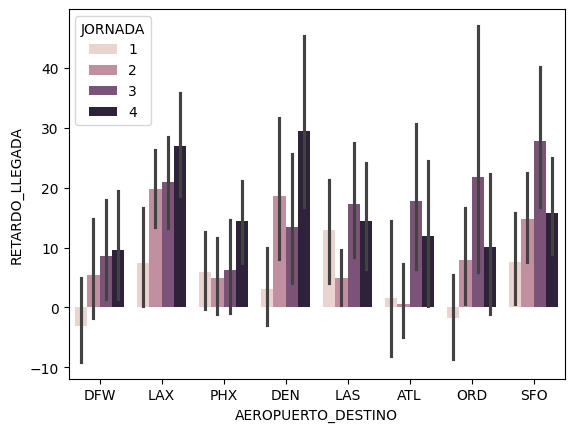

In [46]:
sns.barplot(x='AEROPUERTO_DESTINO', y='RETARDO_LLEGADA', hue='JORNADA', data=bd_muestra)

**Actividad:** Realizar análisis de retardo de salida por aeropuertos de origen

## **7.2 Variable Cualitativa vs Variable Cualitativa**

Resumen Numérico

In [47]:
pdf_dest_retraso=bd4[['AEROPUERTO_DESTINO','RETRASO']].groupby(['AEROPUERTO_DESTINO','RETRASO']).size().reset_index(name='CANTIDAD_VUELOS')
pdf_dest_retraso

,AEROPUERTO_DESTINO,RETRASO,CANTIDAD_VUELOS
0,ATL,0,2527
1,ATL,1,554
2,DEN,0,2885
3,DEN,1,1004
4,DFW,0,2647
5,DFW,1,601
6,LAS,0,2620
7,LAS,1,1055
8,LAX,0,3229
9,LAX,1,2024


Resumen Gráfico

<Axes: xlabel='AEROPUERTO_DESTINO', ylabel='CANTIDAD_VUELOS'>

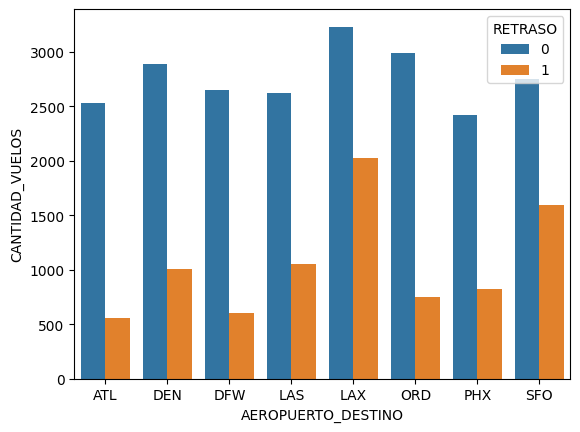

In [48]:
sns.barplot(x='AEROPUERTO_DESTINO', y='CANTIDAD_VUELOS', hue='RETRASO', data=pdf_dest_retraso)

<Axes: xlabel='AEROPUERTO_DESTINO', ylabel='RETRASO'>

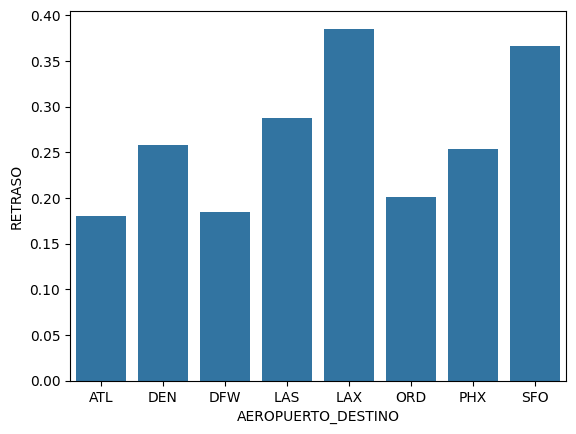

In [49]:
pdf_dest_retraso_mean = bd4.groupby('AEROPUERTO_DESTINO')['RETRASO'].mean().reset_index()
sns.barplot(x='AEROPUERTO_DESTINO', y='RETRASO', data=pdf_dest_retraso_mean)

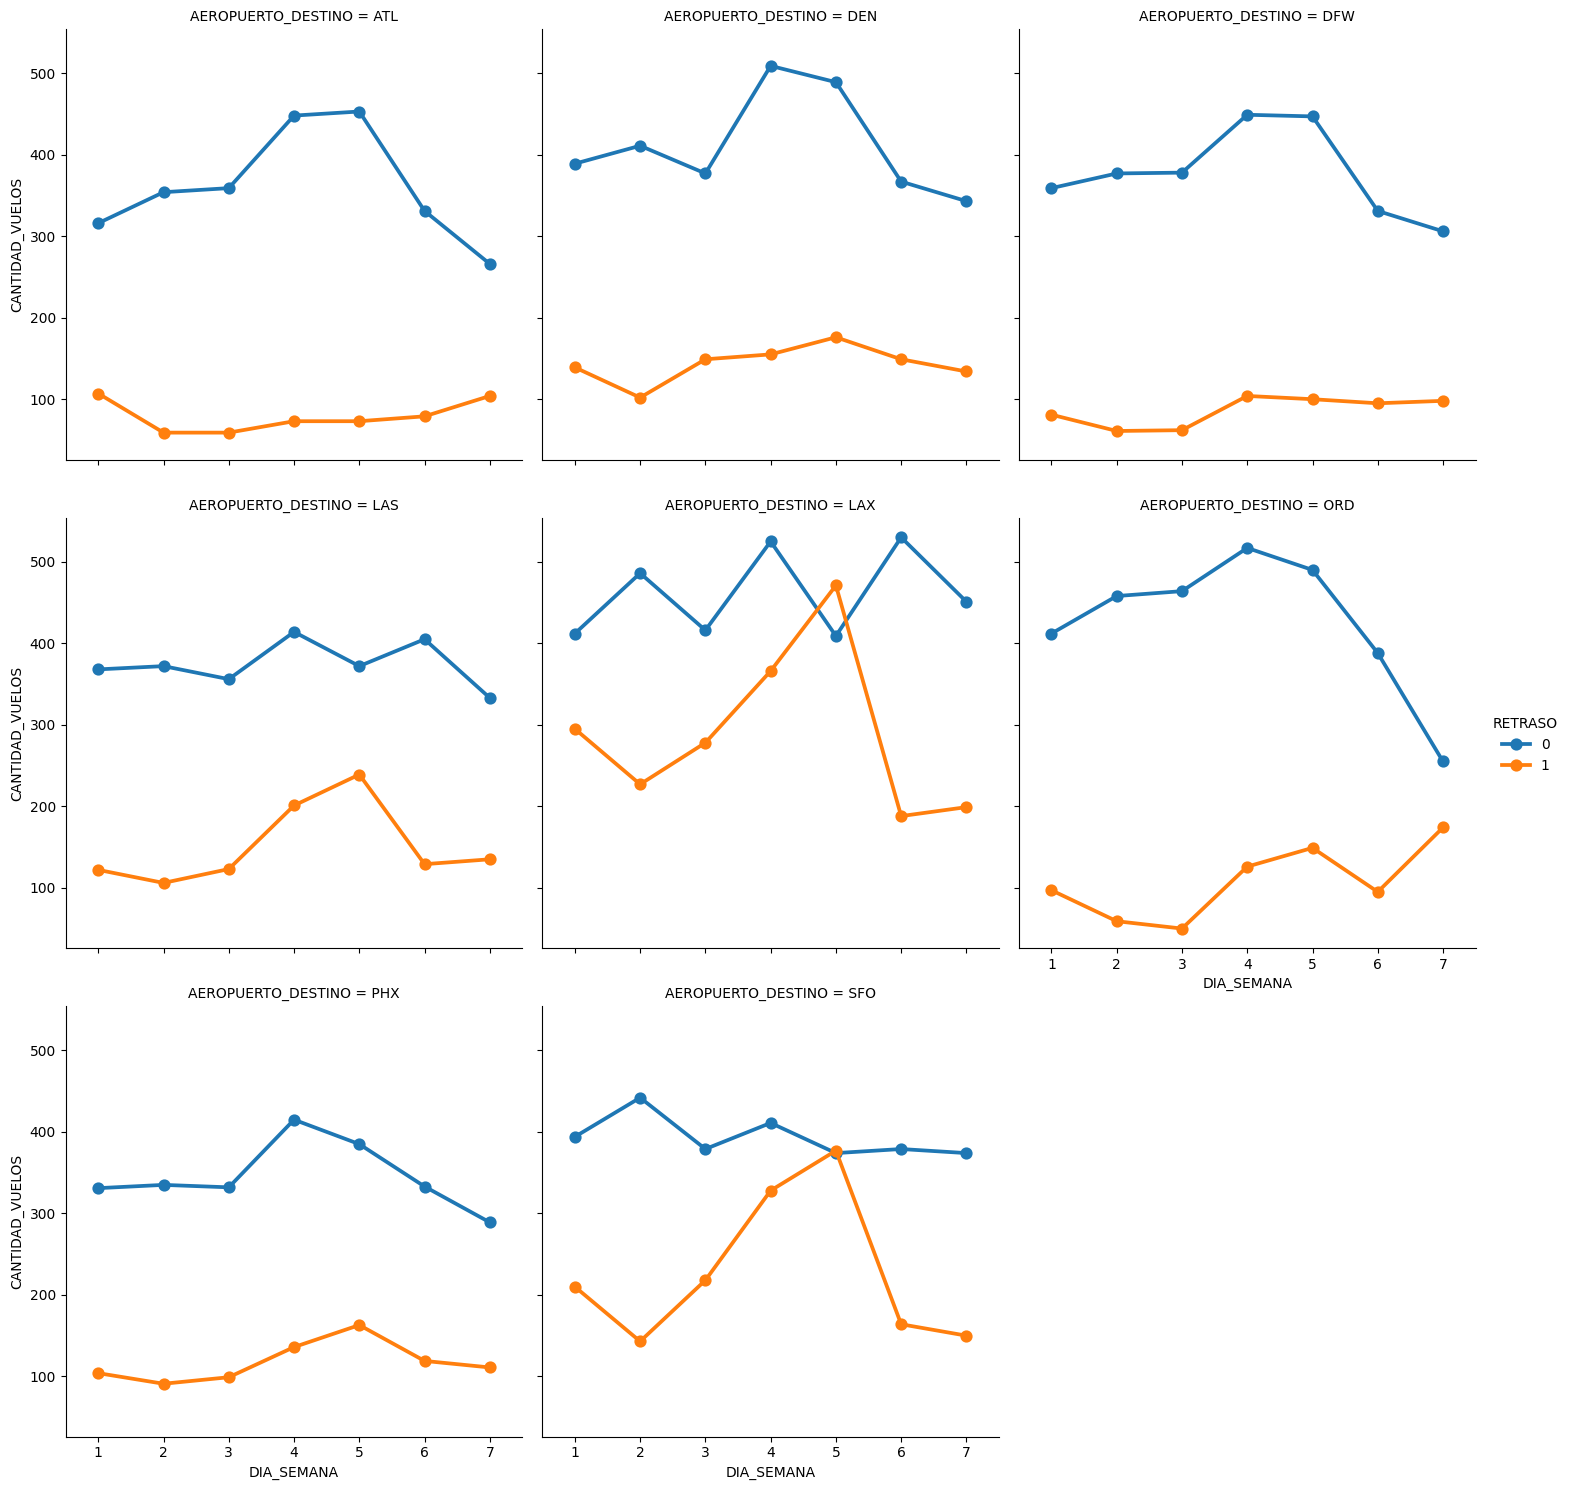

In [50]:
pdf_day_dest= bd4[['DIA_SEMANA','AEROPUERTO_DESTINO','RETRASO']].groupby(['DIA_SEMANA','AEROPUERTO_DESTINO','RETRASO']).size().reset_index(name='CANTIDAD_VUELOS')
sns.catplot(x='DIA_SEMANA', y='CANTIDAD_VUELOS', col='AEROPUERTO_DESTINO', hue='RETRASO', data=pdf_day_dest, col_wrap=3, kind='point')

**Actividad:** Realizar un gráfico donde se muestren la cantidad de vuelos con retraso y sin retraso según la jornada.

## **7.3 Variable Continua vs Variable Continua**

Resumen correlaciones a partir de una muestra

In [51]:
bd_muestra[['RETARDO_LLEGADA','DISTANCIA','RETARDO_SALIDA','DISTANCIA_RETARDO_SALIDA']].corr()

,RETARDO_LLEGADA,DISTANCIA,RETARDO_SALIDA,DISTANCIA_RETARDO_SALIDA
RETARDO_LLEGADA,1.000000,-0.012388,0.949741,0.819719
DISTANCIA,-0.012388,1.000000,0.018907,0.187003
RETARDO_SALIDA,0.949741,0.018907,1.000000,0.874031
DISTANCIA_RETARDO_SALIDA,0.819719,0.187003,0.874031,1.000000


Resumen Gráfico

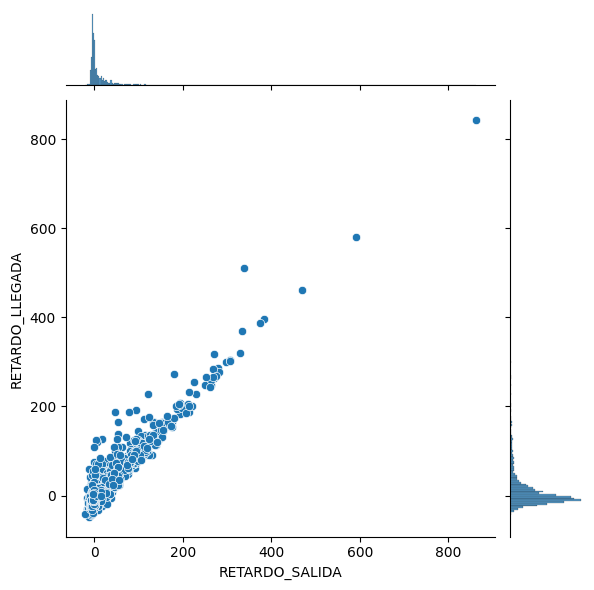

In [52]:
sns.jointplot(x='RETARDO_SALIDA', y='RETARDO_LLEGADA', data=bd_muestra)

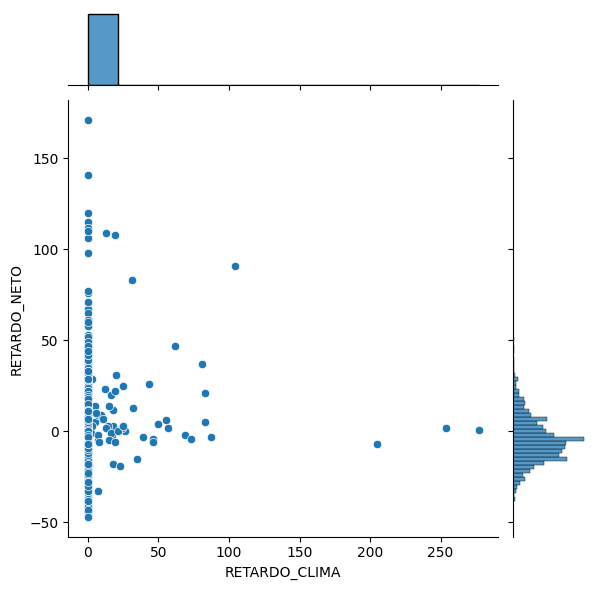

In [53]:
sns.jointplot(x='RETARDO_CLIMA', y='RETARDO_NETO', data=bd_muestra)

# **8. Predicción de retardos (Modelo de Regresión Lineal)**

In [54]:
bd4 = pd.read_csv("bd4.csv",delimiter=',')
bd4

,AEROLINEA,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,FECHA_VUELO,DIA_SEMANA,HORA_SALIDA,DISTANCIA,RETARDO_SALIDA,RETARDO_LLEGADA,VUELO_CANCELADO,...,RETARDO_NAS,RETARDO_SEGURIDAD,RETARDO_AERONAVE,LOG_DISTANCIA,LOG_RETARDO_SALIDA,RETRASO,RETARDO_NETO,RETARDO_SALIDA_2,DISTANCIA_RETARDO_SALIDA,JORNADA
0,AA,LAX,DFW,2016-12-01,4,845,1235.0,-5.0,-7.0,0.0,...,0.0,0.0,0.0,3.091667,1.206826,0,-2.0,25.0,-6175.0,2
1,AA,LAX,DFW,2016-12-02,5,845,1235.0,5.0,-3.0,0.0,...,0.0,0.0,0.0,3.091667,1.416641,0,-8.0,25.0,6175.0,2
2,AA,LAX,DFW,2016-12-03,6,845,1235.0,-3.0,-3.0,0.0,...,0.0,0.0,0.0,3.091667,1.257679,0,0.0,9.0,-3705.0,2
3,AA,LAX,DFW,2016-12-04,7,845,1235.0,-7.0,-2.0,0.0,...,0.0,0.0,0.0,3.091667,1.149219,0,5.0,49.0,-8645.0,2
4,AA,LAX,DFW,2016-12-05,1,845,1235.0,-6.0,-2.0,0.0,...,0.0,0.0,0.0,3.091667,1.178977,0,4.0,36.0,-7410.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,DL,PHX,ATL,2016-12-30,5,550,1587.0,3.0,-2.0,0.0,...,0.0,0.0,0.0,3.200577,1.382017,0,-5.0,9.0,4761.0,1
30462,DL,LAX,ATL,2016-12-30,5,2215,1946.0,11.0,-6.0,0.0,...,0.0,0.0,0.0,3.289143,1.506505,0,-17.0,121.0,21406.0,1
30463,DL,ATL,ORD,2016-12-30,5,1625,606.0,-1.0,-5.0,0.0,...,0.0,0.0,0.0,2.782473,1.303196,0,-4.0,1.0,-606.0,4
30464,DL,ORD,ATL,2016-12-30,5,1815,606.0,0.0,-30.0,0.0,...,0.0,0.0,0.0,2.782473,1.324282,0,-30.0,0.0,0.0,4


216.0


<Axes: ylabel='Frequency'>

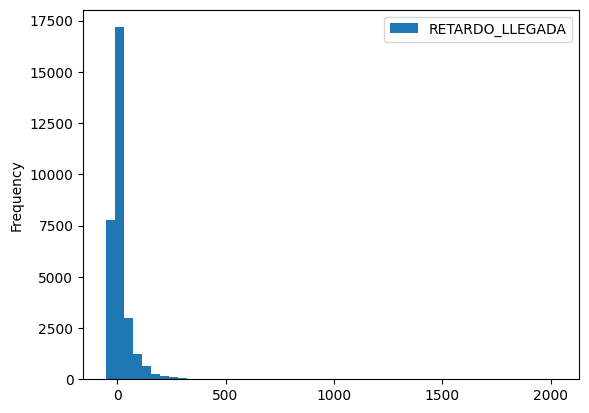

In [55]:
print(bd4['RETARDO_LLEGADA'].quantile(0.99))
bd4[['RETARDO_LLEGADA']].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

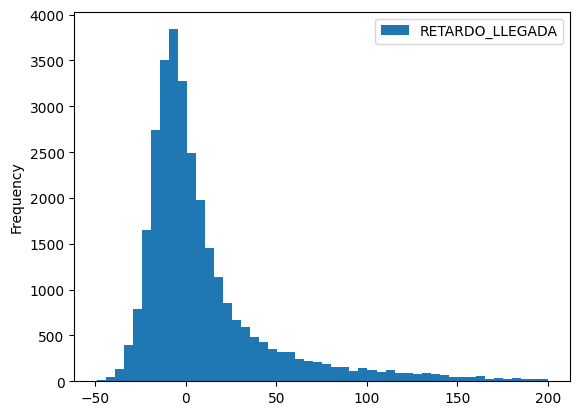

In [105]:
bd5 = bd4[bd4['RETARDO_LLEGADA'].between(-50, 200)]
bd5[['RETARDO_LLEGADA']].plot.hist(bins=50)


<Axes: ylabel='Frequency'>

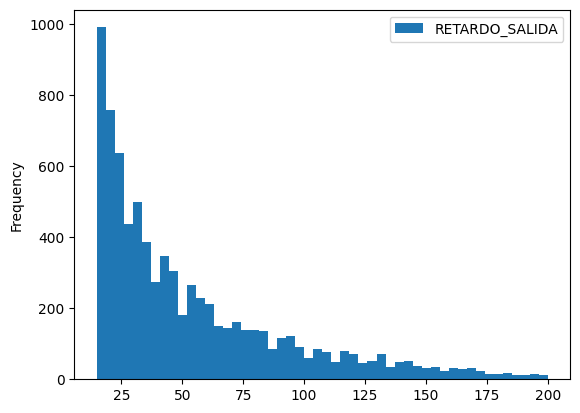

In [106]:
bd5 = bd5[bd5['RETARDO_SALIDA'].between(15, 200)]
bd5[['RETARDO_SALIDA']].plot.hist(bins=50)


In [14]:
# bd5.to_csv('bd5.csv', index=False)

## **8.1 Regresión Lineal Multivariable**

El objetivo de la regresión Lineal Multivariable es estimar los parámetros $(\theta_0,\theta_1,\theta_2,...,\theta_n)$ tal que el error cuadrático medio MSE entre los datos modelados con la hipótesis $h(\theta)$ y los datos observados $y_{obs}$ sea mínima.

Los datos modelados se obtienen con la expresión:

$h(\theta)= \theta_0 x_0+\theta_1 x_1+\theta_2 x_2 + ...+ \theta_n x_n$.

En forma matricial quedaría:

$h(\theta) \theta^T x$

con $\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{bmatrix}
$
y $x = \begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{bmatrix}
$

Donde $(x_0,x_1,x_2,...,x_n)$ representan las características (features), normalmente expresadas como columnas.

El objetivo de la regresión lineal es determinar los parámetros $\theta$ que minimizan la función de costo:

$J(\theta)	 = \displaystyle \frac{1}{2m} \sum_{i=1}^{m} \left(  h_{\theta}(x^{(i)}) - y^{(i)}  \right)^2  $.

* $x_j^{(i)}$ representa el valor de la característica (columna) $j$ del ejemplo (fila) $i$.
* $y^{(i)}$ representa el valor de la variable de interés en el ejemplo $i$.
*$m$ la cantidad total de ejemplos (filas).
*$n$ es la cantidad de características (columnas).

![](https://drive.google.com/uc?export=view&id=1h8XzDY2FRoyAp0kfesp8z0Hu7MusyKm9)


### Configuración de la base de datos (Selección de variables)

In [150]:
bd5.columns

Index(['AEROLINEA', 'AEROPUERTO_ORIGEN', 'AEROPUERTO_DESTINO', 'FECHA_VUELO',
       'DIA_SEMANA', 'HORA_SALIDA', 'DISTANCIA', 'RETARDO_SALIDA',
       'RETARDO_LLEGADA', 'VUELO_CANCELADO', 'VUELO_DESVIADO',
       'RETARDO_AEROLINEA', 'RETARDO_CLIMA', 'RETARDO_NAS',
       'RETARDO_SEGURIDAD', 'RETARDO_AERONAVE', 'LOG_DISTANCIA',
       'LOG_RETARDO_SALIDA', 'RETRASO', 'RETARDO_NETO', 'RETARDO_SALIDA_2',
       'DISTANCIA_RETARDO_SALIDA', 'JORNADA'],
      dtype='object')

In [151]:
X = bd5[['RETARDO_SALIDA','RETARDO_AEROLINEA', 'RETARDO_NAS', 'RETARDO_SEGURIDAD', 'RETARDO_AERONAVE']]
y = bd5[['RETARDO_LLEGADA']]
X

,RETARDO_SALIDA,RETARDO_AEROLINEA,RETARDO_NAS,RETARDO_SEGURIDAD,RETARDO_AERONAVE
17,17.0,0.0,0.0,0.0,0.0
19,19.0,0.0,0.0,0.0,0.0
28,16.0,0.0,0.0,0.0,0.0
32,33.0,0.0,51.0,0.0,0.0
39,40.0,30.0,0.0,0.0,0.0
...,...,...,...,...,...
30415,15.0,0.0,0.0,0.0,0.0
30418,76.0,28.0,0.0,0.0,25.0
30425,15.0,0.0,0.0,0.0,0.0
30433,92.0,66.0,0.0,0.0,15.0


### Partición de datos

- 70% Entrenamiento (train)
- 30% Prueba (test)

In [152]:
from sklearn.model_selection import train_test_split

train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
X_test

,RETARDO_SALIDA,RETARDO_AEROLINEA,RETARDO_NAS,RETARDO_SEGURIDAD,RETARDO_AERONAVE
30207,40.0,15.0,0.0,0.0,21.0
2468,26.0,0.0,0.0,0.0,0.0
25110,29.0,0.0,0.0,0.0,0.0
20272,27.0,17.0,0.0,0.0,0.0
11215,23.0,5.0,0.0,0.0,16.0
...,...,...,...,...,...
15959,44.0,0.0,40.0,0.0,0.0
21612,126.0,0.0,54.0,0.0,69.0
26688,21.0,0.0,0.0,0.0,0.0
8175,15.0,0.0,0.0,0.0,0.0


### Estandarización de variables
Todas las variables quedan con media 0 y desviación estándar 1.

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_test

array([[-0.35738999,  0.07449808, -0.45493033, -0.04284325, -0.06283677],
       [-0.71056633, -0.51915849, -0.45493033, -0.04284325, -0.65097429],
       [-0.63488568, -0.51915849, -0.45493033, -0.04284325, -0.65097429],
       ...,
       [-0.83670074, -0.51915849, -0.45493033, -0.04284325, -0.65097429],
       [-0.98806203, -0.51915849, -0.45493033, -0.04284325, -0.65097429],
       [ 1.61030679, -0.51915849, -0.45493033, -0.04284325,  2.26170678]])

### Ajuste del modelo
Se crea el modelo de regresión lineal.

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

### Coeficientes del modelo

In [155]:
print("model coefficients: {}".format(model.coef_))
print("model intercept: {}".format(model.intercept_))

model coefficients: [[13.96484405 16.14037098 20.84704721  0.55365327 23.32740822]]
model intercept: [51.68119099]


### Resultado del modelo
Se calcula el porcentaje de precisión para el conjunto de datos de validación y de prueba.

In [156]:
print("Training set score: {:.4f} %".format(100*model.score(X_train, y_train)))
print("Test set score: {:.4f} %".format(100*model.score(X_test, y_test)))

Training set score: 95.7116 %
Test set score: 95.1389 %


### Representación gráfica de resultados

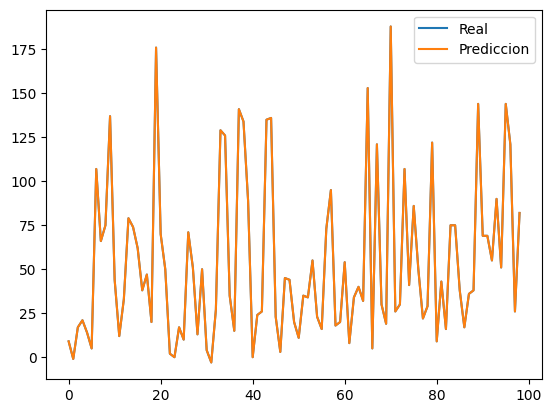

In [136]:
import matplotlib.pyplot as plt
plt.plot(y_test[1:100].to_numpy())
plt.plot(model.predict(X_test[1:100]))
plt.legend(['Real', 'Prediccion'])

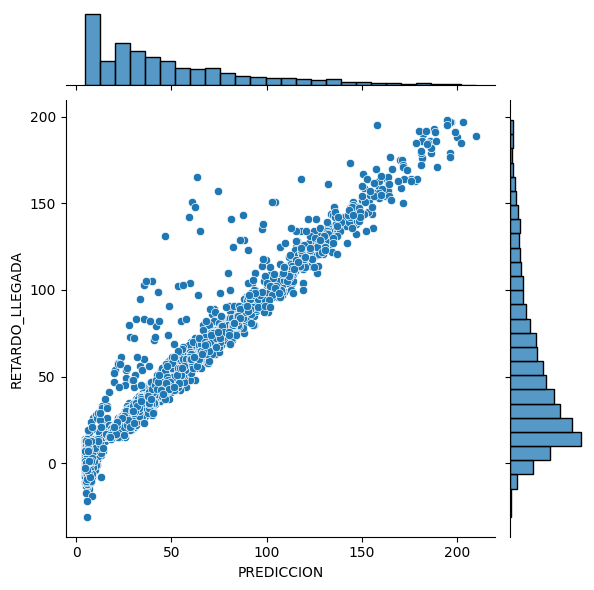

In [157]:
pred=y_test
pred['PREDICCION']=model.predict(X_test)
sns.jointplot(x="PREDICCION", y='RETARDO_LLEGADA', data=pred)

In [158]:
X.columns

Index(['RETARDO_SALIDA', 'RETARDO_AEROLINEA', 'RETARDO_NAS',
       'RETARDO_SEGURIDAD', 'RETARDO_AERONAVE'],
      dtype='object')

In [165]:
lista_features = ['RETARDO_SALIDA','RETARDO_AEROLINEA', 'RETARDO_NAS',
                  'RETARDO_SEGURIDAD', 'RETARDO_AERONAVE', 'RETARDO_LLEGADA']
bd5[lista_features].iloc[400]

RETARDO_SALIDA       104.0
RETARDO_AEROLINEA     19.0
RETARDO_NAS           37.0
RETARDO_SEGURIDAD      0.0
RETARDO_AERONAVE      85.0
RETARDO_LLEGADA      141.0
Name: 1904, dtype: float64

In [166]:
vuelo = np.array([104, 19, 37, 0, 85]).reshape(1, -1)
vuelo_scaled = scaler.transform(vuelo)
vuelo_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.25713045,  0.2328065 ,  0.90861618, -0.04284325,  1.72958235]])

In [168]:
retardo_vuelo = model.predict(vuelo_scaled)
print('El retardo de llegada del vuelo será de:', retardo_vuelo,' minutos')

El retardo de llegada del vuelo será de: [[132.25932258]]  minutos


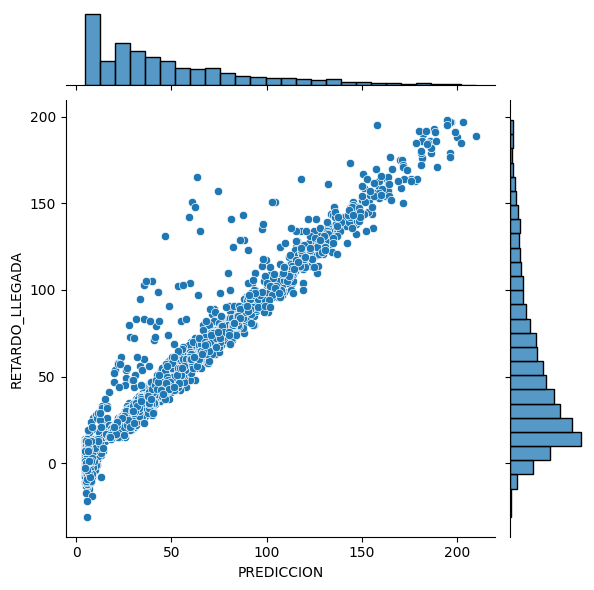

In [119]:
pred=y_test
pred['PREDICCION']=model.predict(X_test)
sns.jointplot(x="PREDICCION", y='RETARDO_LLEGADA', data=pred)

In [ ]:
pred['ERROR']=pred['RETARDO_LLEGADA']-pred['PREDICCION']
sns.jointplot(x="PREDICCION", y="ERROR", data=pred)

## **8.2 Regresión Lineal Multivariable Regularizada**

Para el caso de la Regresión Lineal Multivariable Regularizada, la función de costo cambia:

$J(\theta)	 = \displaystyle \frac{1}{2m} \left[ \sum_{i=1}^{m} \left(  h_{\theta}(x^{(i)}) - y^{(i)}  \right)^2   + \lambda \sum_{j=1}^{n} \theta^2_j \right]$.

El parámetro $\lambda$ sirve de regularizador que permite controlar la complejidad del modelo.

### Creación de variables polinómicas

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X=poly.fit_transform(X)
X

### Partición de datos

- 60% Entrenamiento (train)
- 20% Validación (validation)
- 20% Prueba (test)

In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

### Estandarización de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

### Ajuste de modelos para validación

In [ ]:
from sklearn.linear_model import Ridge
model_1 = Ridge(alpha=0.1).fit(X_train, y_train)
model_2 = Ridge(alpha=1).fit(X_train, y_train)
model_3 = Ridge(alpha=10).fit(X_train, y_train)
model_4 = Ridge(alpha=100).fit(X_train, y_train)

### Resultados del entrenamiento

In [ ]:
print("Training set score model_1: {:.4f} %".format(100*model_1.score(X_train, y_train)))
print("Training set score model_2: {:.4f} %".format(100*model_2.score(X_train, y_train)))
print("Training set score model_3: {:.4f} %".format(100*model_3.score(X_train, y_train)))
print("Training set score model_4: {:.4f} %".format(100*model_4.score(X_train, y_train)))

### Resultado de validación

In [ ]:
print("Validation set score model_1: {:.4f} %".format(100*model_1.score(X_val, y_val)))
print("Validation set score model_2: {:.4f} %".format(100*model_2.score(X_val, y_val)))
print("Validation set score model_3: {:.4f} %".format(100*model_3.score(X_val, y_val)))
print("Validation set score model_4: {:.4f} %".format(100*model_4.score(X_val, y_val)))

### Resultado del modelo final

In [ ]:
model_final=model_3
print("Training set score: {:.2f} %".format(100*model_final.score(X_train, y_train)))
print("Validation set score: {:.2f} %".format(100*model_final.score(X_val, y_val)))
print("Test set score: {:.2f} %".format(100*model_final.score(X_test, y_test)))